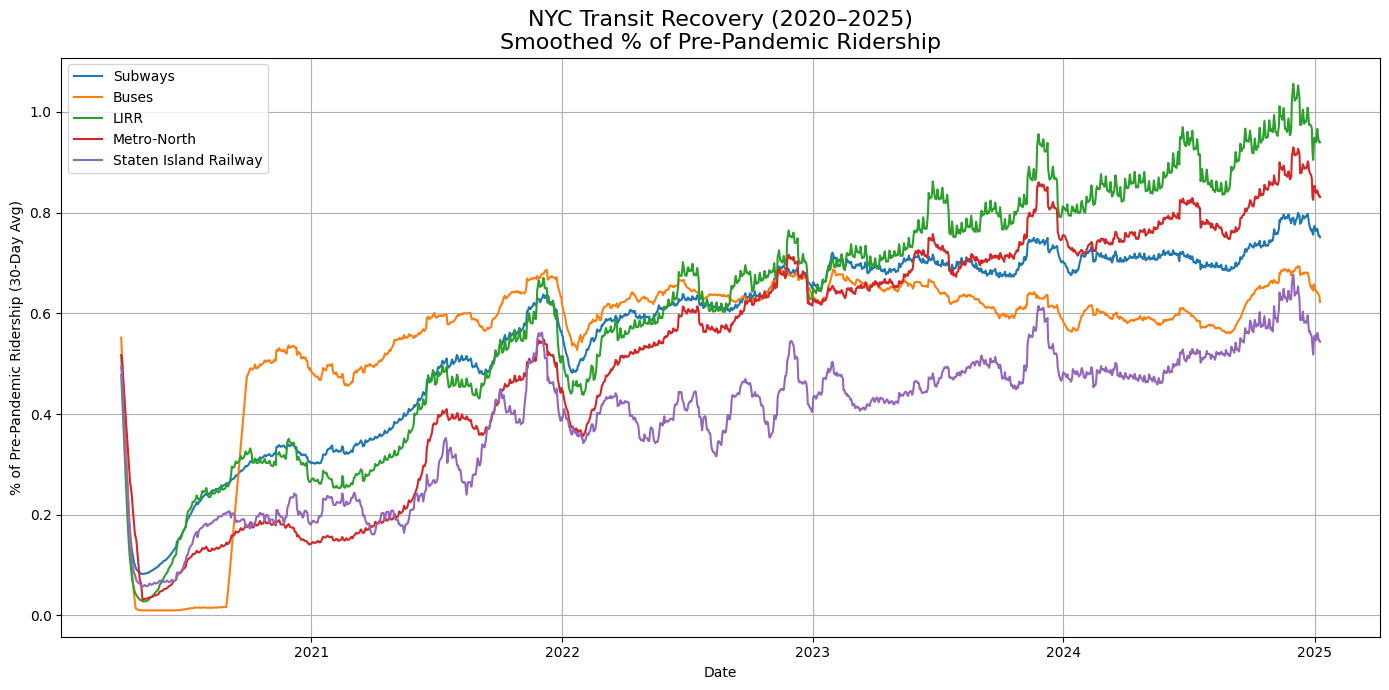

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
df = pd.read_csv("MTA_Daily_Ridership_Data__2020_-_2025.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Year'] = df['Date'].dt.year

# Define target columns
columns_dict = {
    'Subways': 'Subways: % of Comparable Pre-Pandemic Day',
    'Buses': 'Buses: % of Comparable Pre-Pandemic Day',
    'LIRR': 'LIRR: % of Comparable Pre-Pandemic Day',
    'Metro-North': 'Metro-North: % of Comparable Pre-Pandemic Day',
    'Staten Island Railway': 'Staten Island Railway: % of Comparable Pre-Pandemic Day'
}
columns_list = list(columns_dict.values())

# --- 1. 30-Day Rolling Average Line Chart ---
# Average each mode's daily % across entries
grouped = df.groupby('Date')[list(columns_dict.values())].mean().reset_index()


# Rolling average plot
plt.figure(figsize=(14, 7))
for label, col in columns_dict.items():
    plt.plot(grouped['Date'], grouped[col].rolling(30).mean(), label=label)

plt.title("NYC Transit Recovery (2020–2025)\nSmoothed % of Pre-Pandemic Ridership", fontsize=16)
plt.xlabel("Date")
plt.ylabel("% of Pre-Pandemic Ridership (30-Day Avg)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



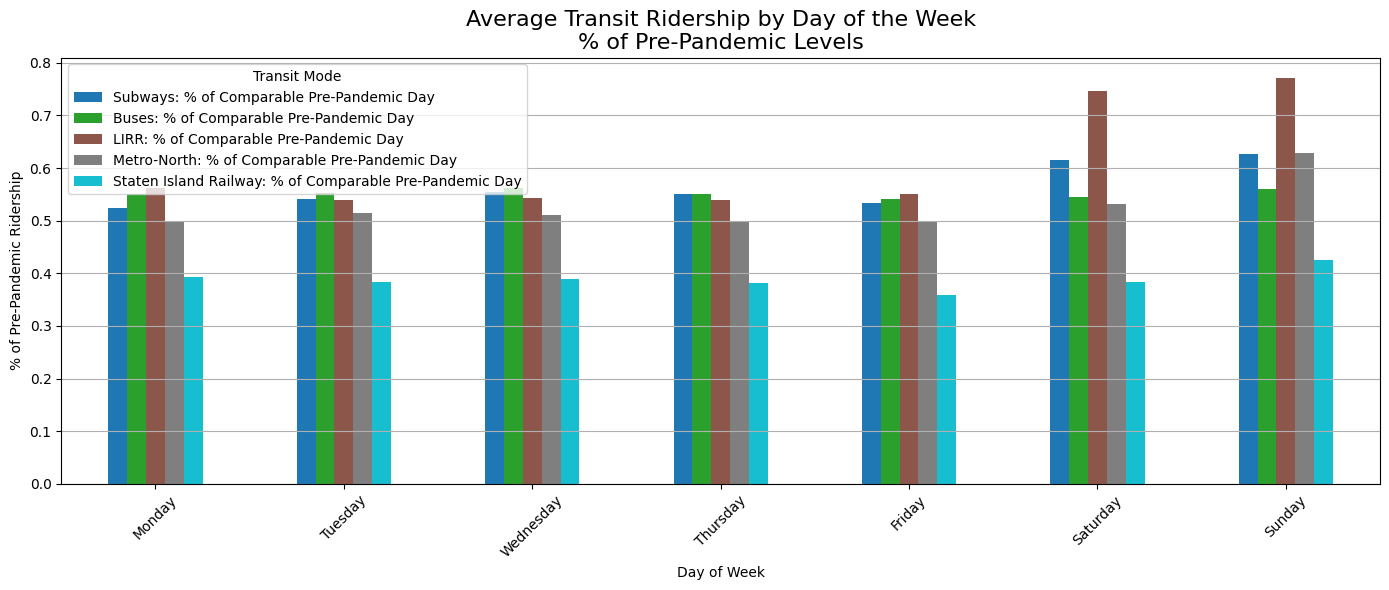

In [8]:


# --- 2. Weekday vs Weekend Bar Chart ---
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = df.groupby('DayOfWeek')[columns_list].mean().reindex(weekday_order)

weekday_avg.plot(kind='bar', figsize=(14, 6), colormap='tab10')
plt.title('Average Transit Ridership by Day of the Week\n% of Pre-Pandemic Levels', fontsize=16)
plt.ylabel('% of Pre-Pandemic Ridership')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.legend(title='Transit Mode')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



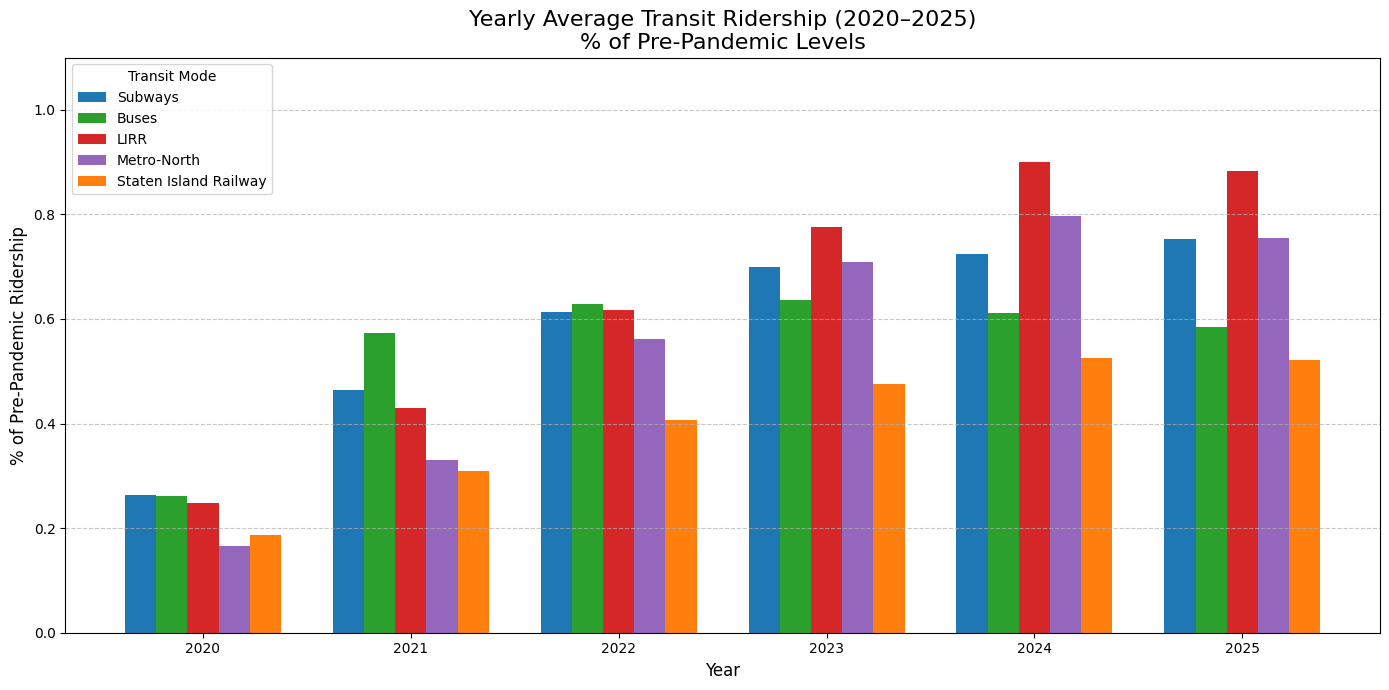

In [9]:
# --- 3. Year-over-Year Bar Chart ---
yearly_avg = df.groupby('Year')[columns_list].mean()

bar_width = 0.15
x = np.arange(len(yearly_avg.index))
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e']
labels = list(columns_dict.keys())

plt.figure(figsize=(14, 7))
for i, (col, color, label) in enumerate(zip(columns_list, colors, labels)):
    plt.bar(x + i*bar_width, yearly_avg[col], width=bar_width, color=color, label=label)

plt.title('Yearly Average Transit Ridership (2020–2025)\n% of Pre-Pandemic Levels', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('% of Pre-Pandemic Ridership', fontsize=12)
plt.xticks(x + bar_width*2, yearly_avg.index)
plt.ylim(0, 1.1)
plt.legend(title="Transit Mode")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
